# Imports

In [ ]:
!pip install --upgrade pyalgotrading    

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "44533df9f3320eaafcd6f4b297edaa697070f36c"
connection.set_access_token(API_TOKEN)

# Strategy Creation

In [5]:
from rsi_macd_crossover_v2 import RSIMACDCrossoverV2 as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'data': 'success',
 'cstcId': 123719,
 'strategyId': 'b0d8f8ae45784f2cac1cbe208b1bf23d'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('MSFT', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:MSFT'

## Setup Parameters

In [9]:
# For BT/PT
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKPR0D9M7AAZSKIPEZW0', 
        'CLIENT_API_SECRET': 'o0Of72gD4jiVrmkq6P3RmggEbhjEhbak0c3RY0Eb'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
  'TIMEPERIOD_FAST': 12,
  'TIMEPERIOD_SLOW': 26,
  'TIMEPERIOD_SIGNAL': 9,
  'TIMEPERIOD_RSI': 3,
  'OVERSOLD_VALUE': 25,
  'OVERBOUGHT_VALUE': 85,
}

## Backtesting

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2023-05-01 09:15 -0400', 
    end='2023-05-11 15:30 -0400', 
    instrument=['NASDAQ:MSFT', 'NASDAQ:AAPL'], 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details,
    delete_previous_trades=False
)

Setting Strategy Config... Success.
Submitting BACKTESTING job... Success.


### Status

In [14]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [15]:
logs = connection.get_backtesting_logs(strategy)
print(logs)

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NASDAQ,MSFT,2023-05-01 18:53:00,BUY,5,₹,306.10,2023-05-01 18:58:00,SELL,5,₹,306.41,1.55,1.55
1,NASDAQ,MSFT,2023-05-01 18:53:00,BUY,5,₹,306.10,2023-05-01 18:58:00,SELL,5,₹,306.41,1.55,3.10
2,NASDAQ,MSFT,2023-05-01 18:53:00,BUY,5,₹,306.10,2023-05-01 18:58:00,SELL,5,₹,306.41,1.55,4.65
3,NASDAQ,MSFT,2023-05-01 18:53:00,BUY,5,₹,306.10,2023-05-01 18:58:00,SELL,5,₹,306.41,1.55,6.20
4,NASDAQ,MSFT,2023-05-01 18:53:00,BUY,5,₹,306.10,2023-05-01 18:58:00,SELL,5,₹,306.41,1.55,7.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,NASDAQ,MSFT,2023-05-11 21:28:00,BUY,5,₹,309.67,2023-05-12 01:00:00,SELL,5,₹,309.55,-0.60,43.80
691,NASDAQ,AAPL,2023-05-11 21:28:00,BUY,5,₹,173.55,2023-05-12 01:00:00,SELL,5,₹,173.59,0.20,44.00
692,NASDAQ,MSFT,2023-05-11 21:28:00,BUY,5,₹,309.67,2023-05-12 01:00:00,SELL,5,₹,309.55,-0.60,43.40
693,NASDAQ,MSFT,2023-05-11 21:28:00,BUY,5,₹,309.67,2023-05-12 01:00:00,SELL,5,₹,309.55,-0.60,42.80


## Statistics Reports

### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...
                    Strategy
------------------  ----------
Start Period        2023-05-01
End Period          2023-05-11
Risk-Free Rate      0.0%
Time in Market      99.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              0.73
Prob. Sharpe Ratio  70.0%
Sortino             0.94
Sortino/√2          0.67
Omega               1.14

Max Drawdown        -0.0%
Longest DD Days     8

Gain/Pain Ratio     0.35
Gain/Pain (1M)      -

Payoff Ratio        0.79
Profit Factor       1.14
Common Sense Ratio  1.21
CPC Index           0.53
Tail Ratio          1.06
Outlier Win Ratio   3.73
Outlier Loss Ratio  4.34

MTD                 0.0%
3M                  0.0%
6M                  0.0%
YTD                 0.0%
1Y                  0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  1
Recovery Factor     0.31
Ulcer Index         0.0

### Quantstats Full Report

Generating Statistics for already fetched P&L data...


                           Strategy
-------------------------  ----------
Start Period               2023-05-01
End Period                 2023-05-11
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     0.73
Prob. Sharpe Ratio         70.0%
Smart Sharpe               0.55
Sortino                    0.94
Smart Sortino              0.72
Sortino/√2                 0.67
Smart Sortino/√2           0.51
Omega                      1.14

Max Drawdown               -0.0%
Longest DD Days            8
Volatility (ann.)          0.0%
Calmar                     11.35
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            7.47%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       10
Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-05-02,2023-05-04,2023-05-10,8,-1.378000e-05,-1.361500e-05
2,2023-05-11,2023-05-11,2023-05-11,0,-2.720000e-06,-1.550000e-06
3,2023-05-01,2023-05-01,2023-05-01,0,-1.755000e-06,-1.280000e-06
4,2023-05-01,2023-05-01,2023-05-01,0,-1.445000e-06,-6.350000e-07
5,2023-05-10,2023-05-10,2023-05-11,0,-7.600000e-07,-5.550000e-07


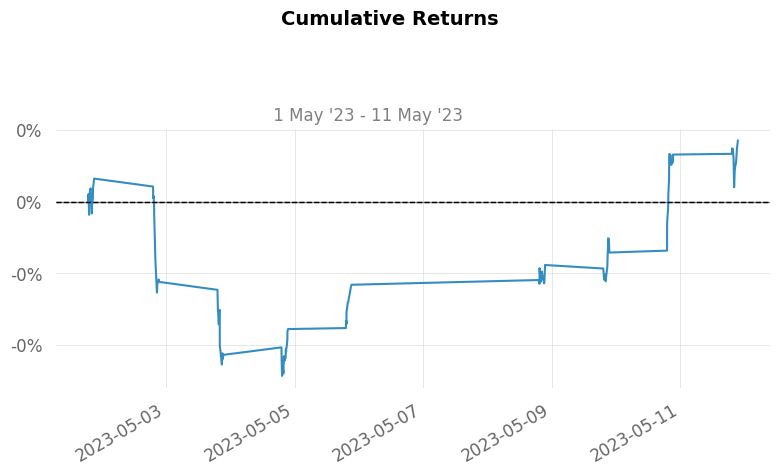

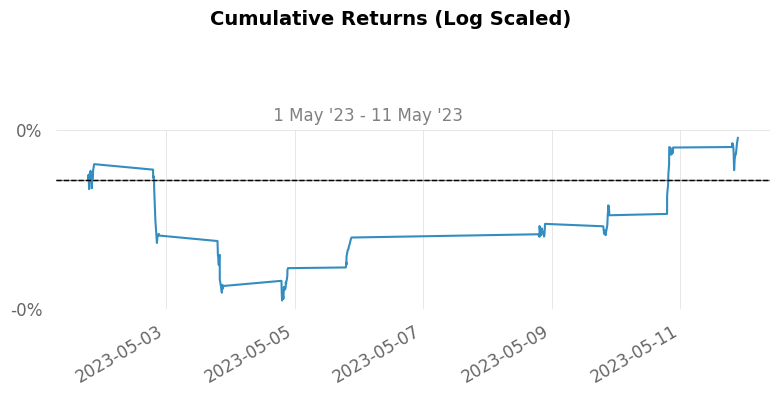

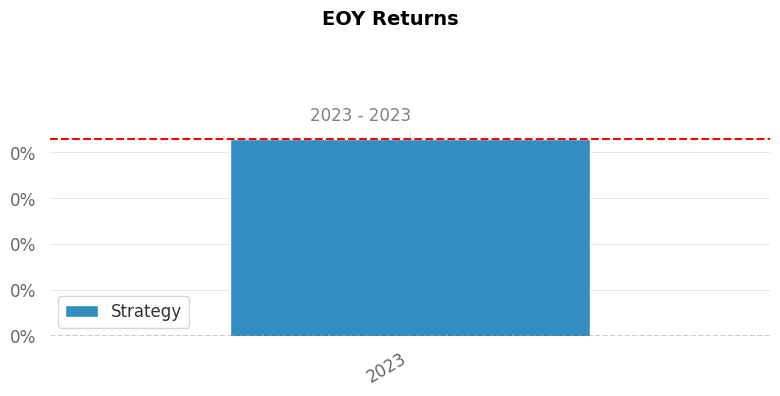

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/_plotting/core.py:355: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(returns, color='black', linewidth=1.5)


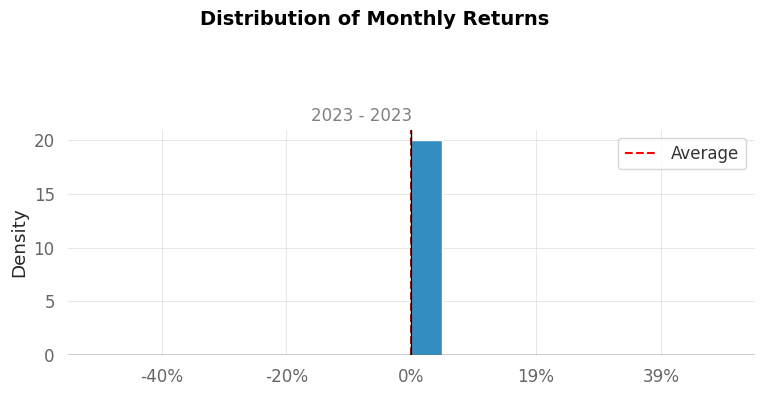

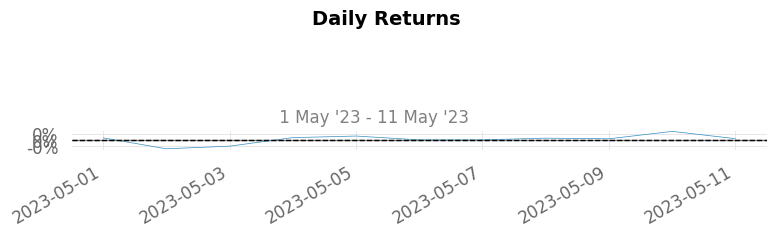

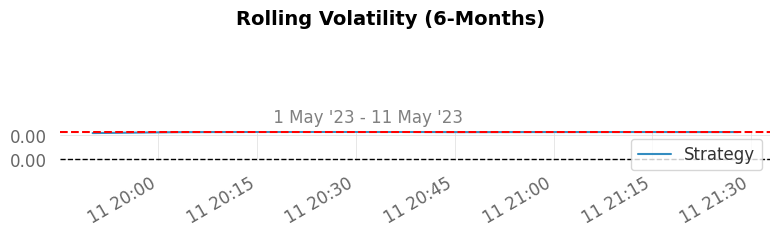

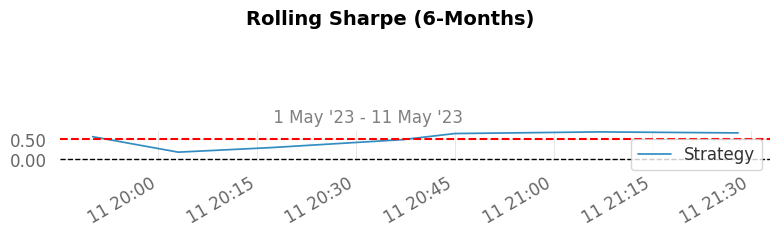

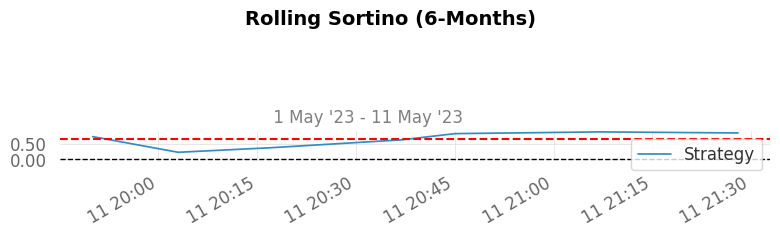

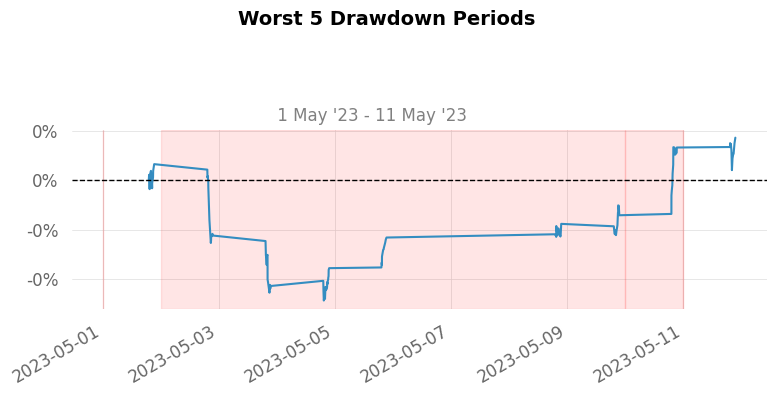

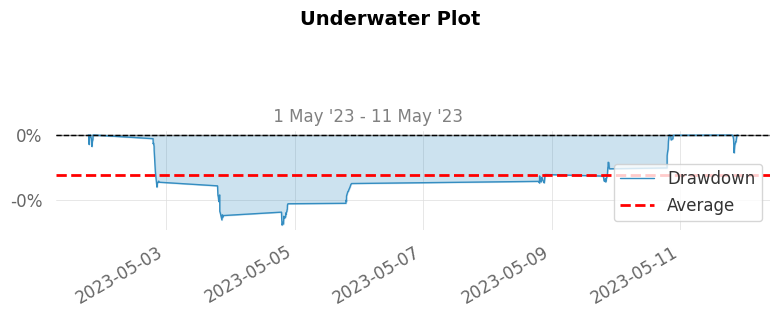

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


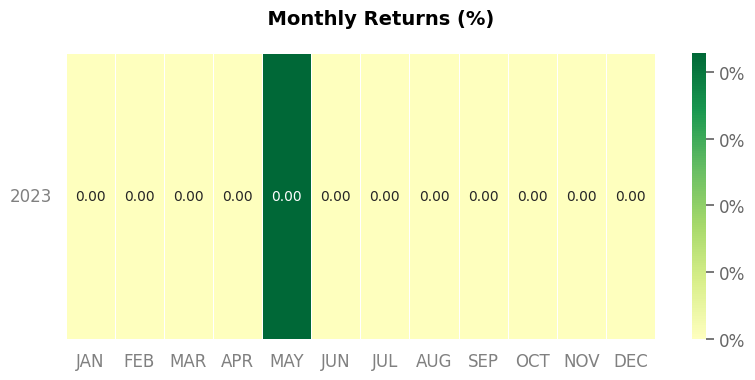

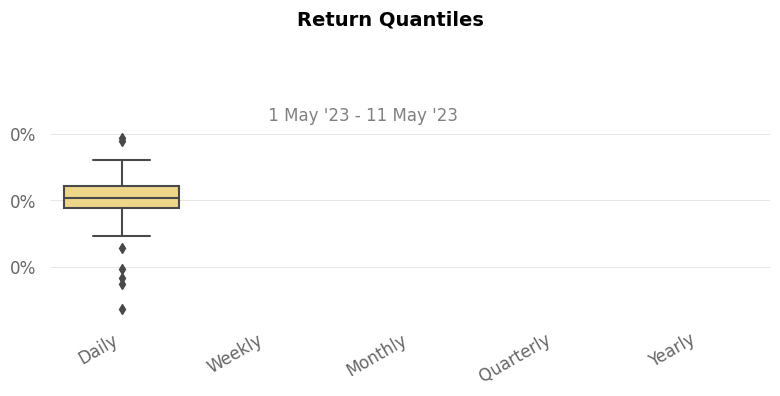

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/_plotting/core.py:355: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(returns, color='black', linewidth=1.5)
/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

## Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+----------------+---------------------------+----------------------------------+------+
| INST           | TIME                      | ID                               | TT   |
|----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:MSFT | 2023-05-01 09:23:00-04:00 | da6b271d92914f1faad3068e7b34ce54 | BUY  |
+----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2023-05-01 09:23:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2023-05-01 09:23:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2023-05-01 09:23:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2023-05-01 09:23:00.500000-04:00 | OPEN                   |       |
|  4 | 2023-05-01 09:23:00.5

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400',
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
    delete_previous_trades=False
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Papertrading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Papertrading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Realtrading

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Realtrading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Realtrading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)